# Understanding and Inplementing Novelty and Outlier Detection

Outliers
- Data point that difers significantly from other data points in the data set
- Encountered during training
- unsupervised
- never form a dense cluster

Novelty
- A data point encountered in prediction that differs significantly from any data points encountered during training
- Not in the original data set
- differs from data point in training data
- in test or prediction data set
- semi-supervised
- could form a dense cluster

Outlier detection
- Algorithm that fits regions of the dataset where data poits are the most concentrated, deviant observations are outliers

Novelty Detection
- Try to detect whether new observations are deviant

## Outliers
- identifying Outliers
    - Distance from the mean
    - Distance from fitted line
- coping with outliers
    - drop if erraneaous observation
    - cap if the model is distorted by outliers
    - set to mean if only one observation as an error

Outlier and Novelty detection algorithms in scikit-learn
- Local outlier factor
- Elliptic Envelope
- Isolation Forest

### Local Outlier Factor

Compute LOF socre for each point. It is an outlier if:
- point is far from its nearest neighbors
- those neighbors are close to each other
- uses the k-nearest neighbors (euclidian distance)
- If the average densenty of the candidate point is nuch lower than the average density of its neighboring points it is consedred an outlier
- How isolated a particular point is when compared to its neighbors
- works well with moderatly high dimentionality data
- considers both local and global properties 

- need to set novelty to true fro novelty detection

### Elliptic Envelope

- Assumes that the data is drawn from a normal or gaussian distribuition
- Draw eleiptical envelope through the central data points
- All points outside the ellipse are consedered outliers
- Robust Covariance estimate
- Minimum covariance determinant (mahalanobis distance)
    - similar to euclidean variance (l2) but each dimention is normalized to have equal variance

### Isolation Forest

- Random forest of desition trees
- ...
- Find how many splits are needed to isolate a point
- Smaller number of splits, the more likely the point is to be an outlier

## Outlier Detection Using LOD

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
student_scores = pd.read_csv('02/demos/datasets/student_performance.csv')

student_scores.sample(5)

,Hours Studied,Score Obtained,Outliers
71,619,91.893768,False
24,172,5.040238,False
51,400,45.016600,False
48,362,34.163873,False
117,960,99.852850,False


In [4]:
student_scores.shape

(122, 3)

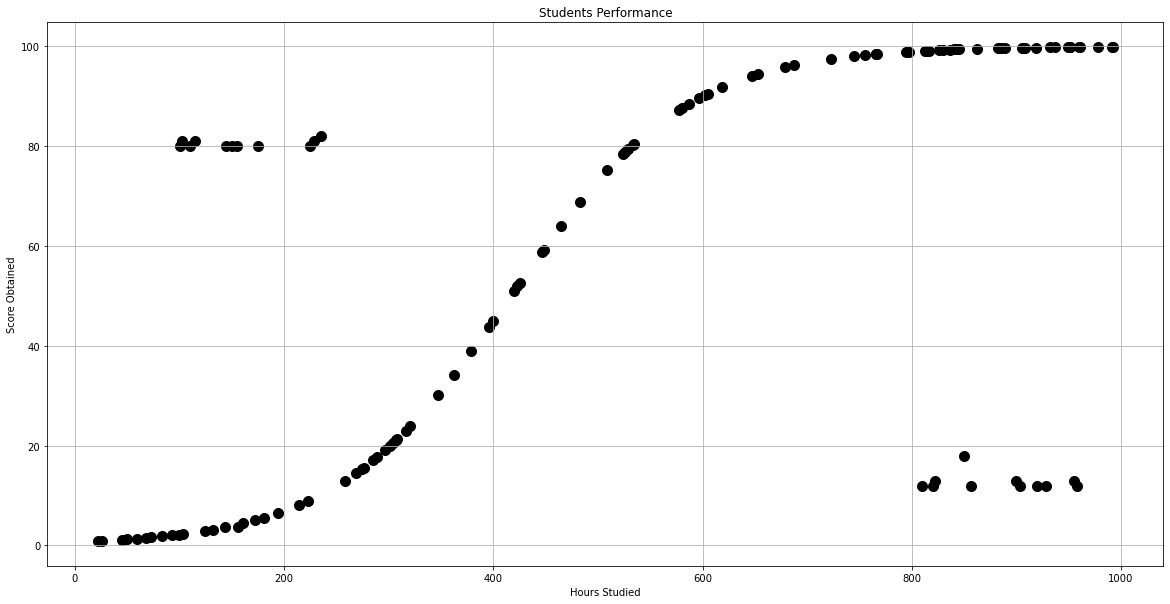

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(student_scores['Hours Studied'],
            student_scores['Score Obtained'],
            color='black',
            s=100)

ax.set(xlabel='Hours Studied', ylabel='Score Obtained', title='Students Performance')

ax.grid()

plt.show()

In [7]:
student_scores.groupby('Outliers').size()

Outliers
False    100
True      22
dtype: int64

In [9]:
X = student_scores.drop('Outliers', axis=1)
X.head()

,Hours Studied,Score Obtained
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


In [10]:
from sklearn.neighbors import LocalOutlierFactor

In [11]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2)

In [12]:
y_pred = lof.fit_predict(X)
y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [13]:
n_outliers = (y_pred ==-1).sum()
n_outliers

25

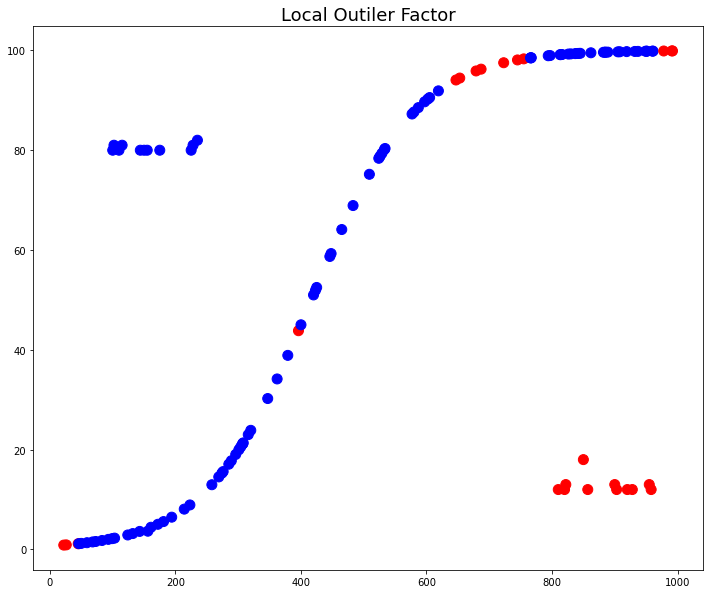

In [16]:
colors = np.array(['r', 'b'])
plt.figure(figsize=(12,10))
plt.title('Local Outiler Factor', size=18)
plt.scatter(student_scores['Hours Studied'],
            student_scores['Score Obtained'],
            s=100,
            color=colors[(y_pred+1)//2])
plt.show(9)

In [17]:
X_scores = lof.negative_outlier_factor_
X_scores

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938,
       -1.03039928, -0.98395541, -0.97939208, -1.01269424, -0.96696018,
       -0.96737591, -0.99460791, -0.97612705, -0.95809487, -1.01195749,
       -1.01531276, -1.02251399, -0.95511057, -0.95961389, -0.96145326,
       -1.02771782, -0.96891175, -0.97850146, -0.98619115, -0.99666125,
       -0.99361717, -0.99170612, -0.99282767, -1.0128736 , -1.00195489,
       -1.00102812, -1.00025359, -0.9905836 , -0.98924894, -0.97888615,
       -0.97709147, -0.97796595, -0.98004792, -0.98004792, -0.98118573,
       -0.98656031, -0.98884869, -1.01038906, -1.04174962, -1.04964314,
       -1.05547725, -1.04610136, -1.03406249, -1.01951322, -1.02146054,
       -1.03259426, -1.01717545, -1.02345066, -1.02929812, -1.03763217,
       -1.02886507, -1.02886507, -1.030146  , -1.03107404, -1.03100017,
       -1.02456492, -1.02425818, -1.02938883, -1.04024032, -1.04

In [18]:
radius = (X_scores.max()-X_scores)/(X_scores.max()-X_scores.min())

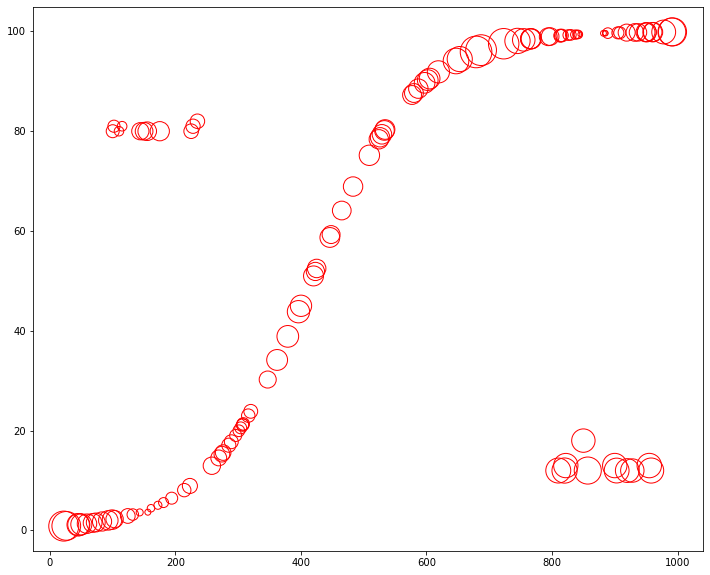

In [20]:
plt.figure(figsize=(12,10))
plt.scatter(student_scores['Hours Studied'],
            student_scores['Score Obtained'],
            s=1000*radius,
            edgecolors='r',
            facecolors='none',
            label='Outlier scores')
plt.show()

## Outlier detection using isolation forest

In [21]:
from sklearn.ensemble import IsolationForest

In [23]:
isf = IsolationForest(contamination=0.2)

In [24]:
y_pred = isf.fit_predict(X)
y_pred

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [25]:
n_outliers = (y_pred ==-1).sum()
n_outliers

25

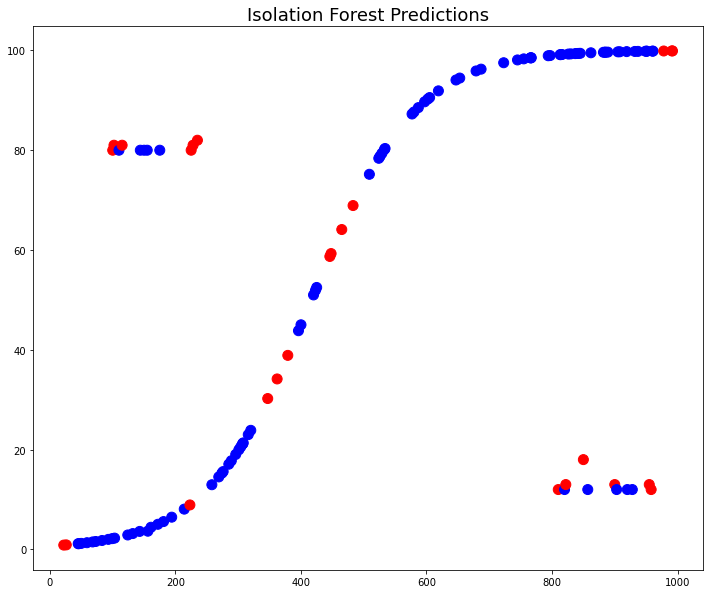

In [27]:
colors = np.array(['r', 'b'])
plt.figure(figsize=(12,10))
plt.title('Isolation Forest Predictions', size=18)
plt.scatter(student_scores['Hours Studied'],
            student_scores['Score Obtained'],
            s=100,
            color=colors[(y_pred+1)//2])
plt.show()

In [28]:
student_scores.describe()

,Hours Studied,Score Obtained
count,122.000000,122.000000
mean,519.131148,56.665412
std,316.030884,39.929084
min,22.000000,0.869736
25%,225.750000,13.000000
50%,525.000000,78.582806
75%,829.000000,98.510907
max,992.000000,99.899724


In [29]:
xx, yy = np.meshgrid(np.linspace(0,1010,500), np.linspace(0,102,500))

print('xx = ', xx.ravel())
print('yy = ', yy.ravel())

xx =  [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy =  [  0.   0.   0. ... 102. 102. 102.]


In [30]:
np.c_[xx.ravel(), yy.ravel()]

array([[   0.        ,    0.        ],
       [   2.0240481 ,    0.        ],
       [   4.04809619,    0.        ],
       ...,
       [1005.95190381,  102.        ],
       [1007.9759519 ,  102.        ],
       [1010.        ,  102.        ]])

In [31]:
Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Z

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

<ipython-input-32-343601dbed5a>:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx, yy, Z, levels=[0], linewidth=2, colors='black')


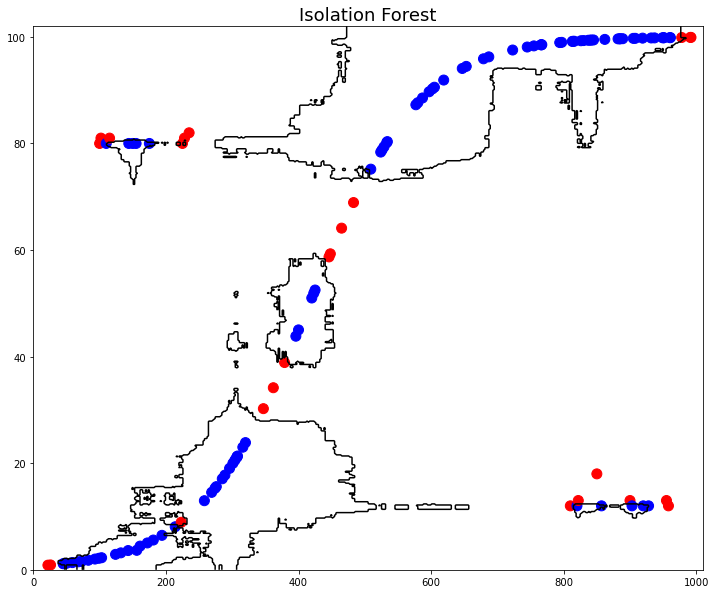

In [32]:
plt.figure(figsize=(12,10))
plt.title('Isolation Forest', size=18)
plt.scatter(student_scores['Hours Studied'],
            student_scores['Score Obtained'],
            s=100,
            color=colors[(y_pred+1)//2])
plt.contour(xx, yy, Z, levels=[0], linewidth=2, colors='black')
plt.show()

## Outlier detection using EllipticEnvelope

In [33]:
from sklearn.covariance import EllipticEnvelope

In [34]:
ee = EllipticEnvelope(support_fraction=1., contamination=0.19)

In [35]:
y_pred = ee.fit_predict(X)
y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1])

In [36]:
n_outliers = (y_pred==-1).sum()
n_outliers

23

In [38]:
xx, yy = np.meshgrid(np.linspace(0,1010,500), np.linspace(-5, 120, 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


<ipython-input-39-8e384c174999>:4: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,Z, levels=[0], linewidth=2, colors='black')


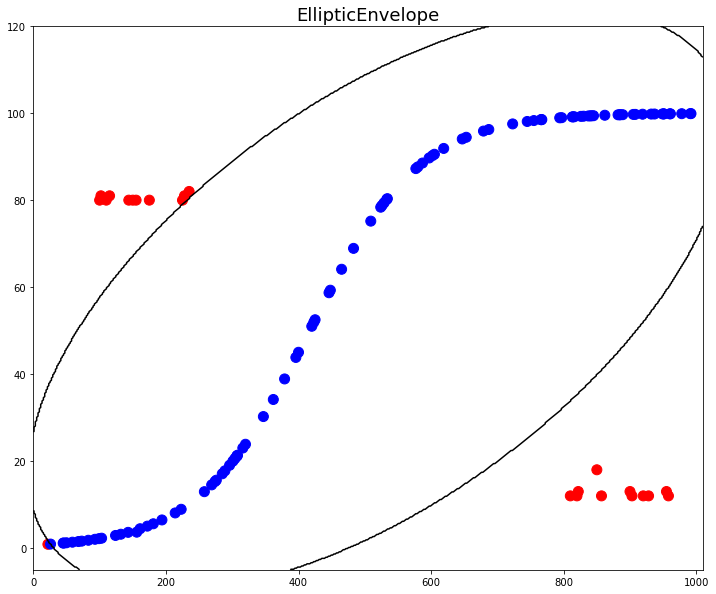

In [39]:
plt.figure(figsize=(12,10))
plt.title('EllipticEnvelope', size=18)
plt.scatter(student_scores['Hours Studied'], student_scores['Score Obtained'], s=100, color=colors[(y_pred+1)//2])
plt.contour(xx,yy,Z, levels=[0], linewidth=2, colors='black')
plt.show()

## Novelty detection using LOF

In [40]:
student_scores = pd.read_csv('02/demos/datasets/student_performance_modified.csv')

student_scores.sample(10)

,Hours Studied,Score Obtained,Outliers,Training,Test
69,602,90.238411,False,1,0
70,605,90.550963,False,0,1
48,362,34.163873,False,0,1
81,767,98.528408,False,1,0
104,903,12.000000,True,0,1
6,68,1.500874,False,0,1
47,347,30.237790,False,1,0
77,745,98.092280,False,1,0
61,526,78.784764,False,1,0
26,181,5.582973,False,0,1


In [44]:
student_scores.shape

(122, 5)

In [45]:
x_training = student_scores.loc[student_scores['Training']==1]
x_training.head()

,Hours Studied,Score Obtained,Outliers,Training,Test
1,26,0.912112,False,1,0
3,46,1.156660,False,1,0
5,59,1.349299,False,1,0
7,73,1.592205,False,1,0
9,93,2.015385,False,1,0


In [46]:
x_training.shape

(50, 5)

In [48]:
x_training = x_training.drop(['Outliers', 'Training', 'Test'], axis=1)
x_training.head()

,Hours Studied,Score Obtained
1,26,0.912112
3,46,1.156660
5,59,1.349299
7,73,1.592205
9,93,2.015385


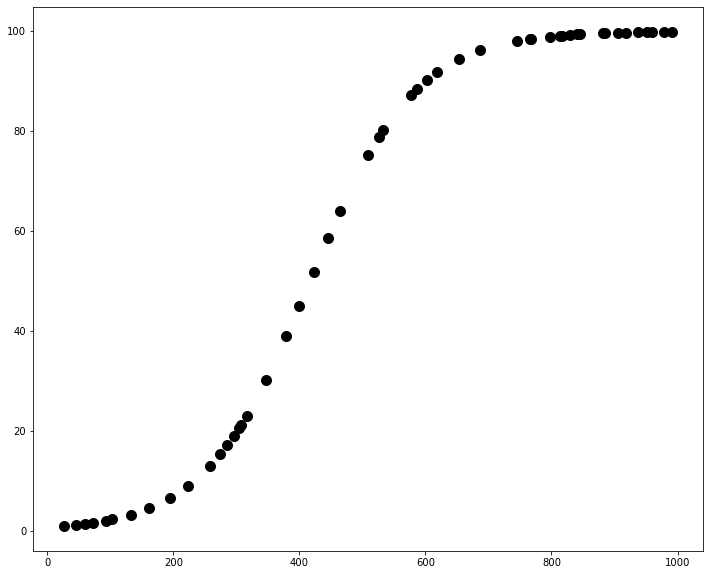

In [49]:
plt.figure(figsize=(12, 10))

plt.scatter(x_training['Hours Studied'], 
            x_training['Score Obtained'], 
            s=100, 
            c='black')

plt.show()

In [51]:
x_testing = student_scores.loc[student_scores['Test']==1]

x_testing = x_testing.drop(['Outliers', 'Training', 'Test'], axis=1)

x_testing.head()

,Hours Studied,Score Obtained
0,22,0.869736
2,45,1.143020
4,50,1.212843
6,68,1.500874
8,83,1.791570


In [52]:
x_testing.shape

(72, 2)

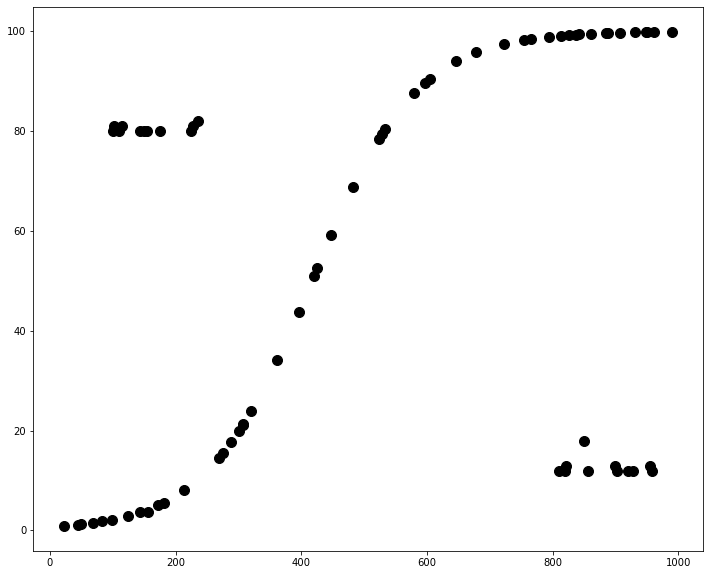

In [53]:
plt.figure(figsize=(12, 10))

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=100, 
            c='black')

plt.show()

In [54]:
lof_novelty = LocalOutlierFactor(n_neighbors=5, 
                                 contamination='auto', 
                                 novelty=True)

lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [55]:
n_outliers = (y_pred == -1).sum()
n_outliers

14

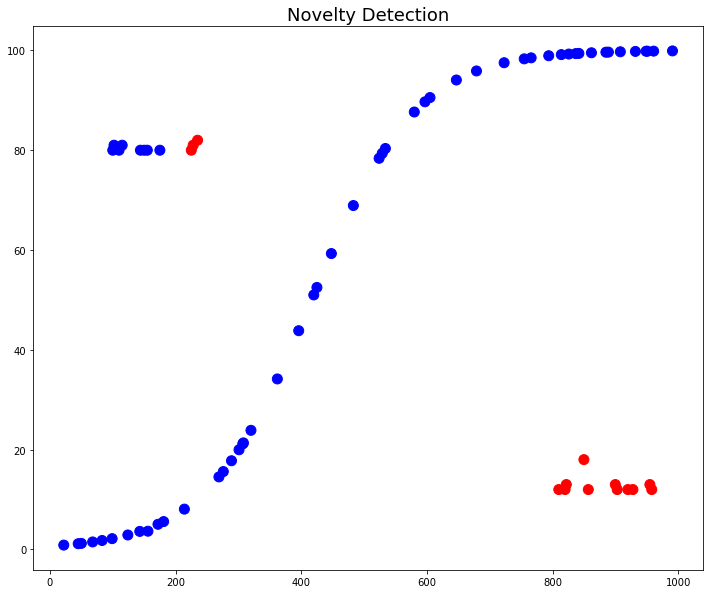

In [56]:
plt.figure(figsize=(12, 10))

plt.title('Novelty Detection', size=18)

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [57]:
lof_novelty = LocalOutlierFactor(n_neighbors=5, 
                                 contamination=0.01, 
                                 novelty=True)
lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [58]:
n_outliers = (y_pred == -1).sum()
n_outliers

22

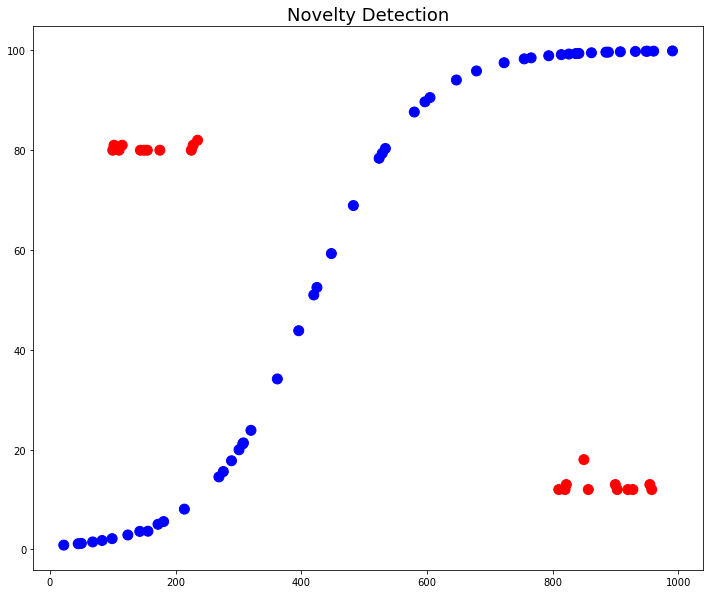

In [59]:
plt.figure(figsize=(12, 10))

plt.title('Novelty Detection', size=18)

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [60]:
INLIER = np.array([[500, 99]])
OUTLIER = np.array([[10000, 40000]])

In [61]:
lof_novelty.predict(INLIER), lof_novelty.predict(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


(array([1]), array([-1]))

In [62]:
lof_novelty.score_samples(INLIER), lof_novelty.score_samples(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


(array([-1.01386409]), array([-818.57692939]))

In [63]:
lof_novelty.decision_function(INLIER), lof_novelty.decision_function(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


(array([0.39025402]), array([-817.17281128]))

In [64]:
isf.predict(INLIER), isf.predict(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(array([1]), array([-1]))

In [65]:
isf.score_samples(INLIER), isf.score_samples(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(array([-0.52405808]), array([-0.55815305]))

In [66]:
isf.decision_function(INLIER), isf.decision_function(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(array([0.01632372]), array([-0.01777124]))

In [68]:
ee.predict(INLIER), ee.predict(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


(array([1]), array([-1]))

In [69]:
ee.score_samples(INLIER), ee.score_samples(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


(array([-1.87453537]), array([-1503979.60043687]))

In [70]:
ee.decision_function(INLIER), ee.decision_function(OUTLIER)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


(array([0.92463624]), array([-1503976.80126526]))

In [72]:
head_brain_data = pd.read_csv('02/demos/datasets/headbrain.csv')

head_brain_data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [73]:
head_brain_data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [74]:
HEAD_SIZE = 'Head Size(cm^3)'
BRAIN_WEIGHT = 'Brain Weight(grams)'

In [75]:
X = head_brain_data[[HEAD_SIZE, BRAIN_WEIGHT]]

X.sample(10)

,Head Size(cm^3),Brain Weight(grams)
204,3067,1150
191,3354,1204
203,3851,1405
183,3181,1175
35,3814,1207
193,3687,1355
177,3561,1127
107,3399,1226
90,4160,1370
23,3710,1270


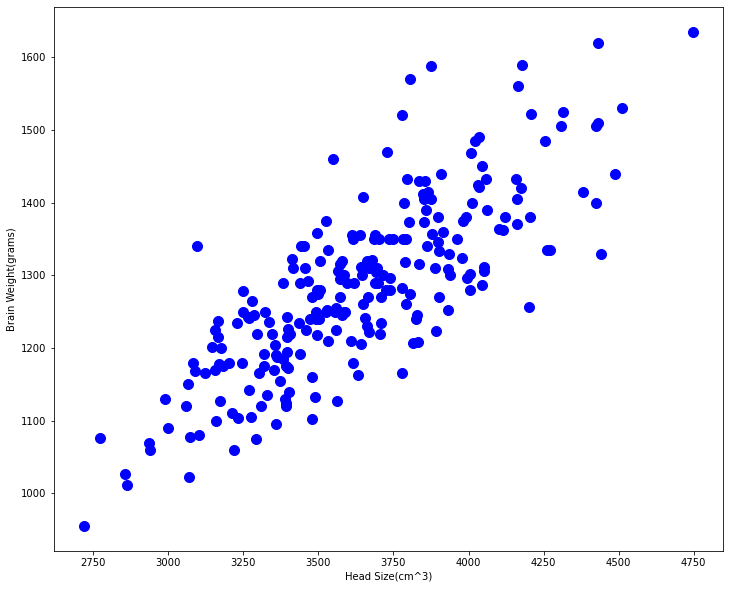

In [76]:
plt.figure(figsize=(12, 10))

plt.scatter(X[HEAD_SIZE], X[BRAIN_WEIGHT], s=100, color='blue')

plt.ylabel("Brain Weight(grams)")
plt.xlabel("Head Size(cm^3)")

plt.show()

In [77]:
ee = EllipticEnvelope(support_fraction=None, contamination=0.1)

In [78]:
y_pred = ee.fit_predict(X)

y_pred

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [79]:
n_outliers = (y_pred == -1).sum()
n_outliers

24

In [80]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                     np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


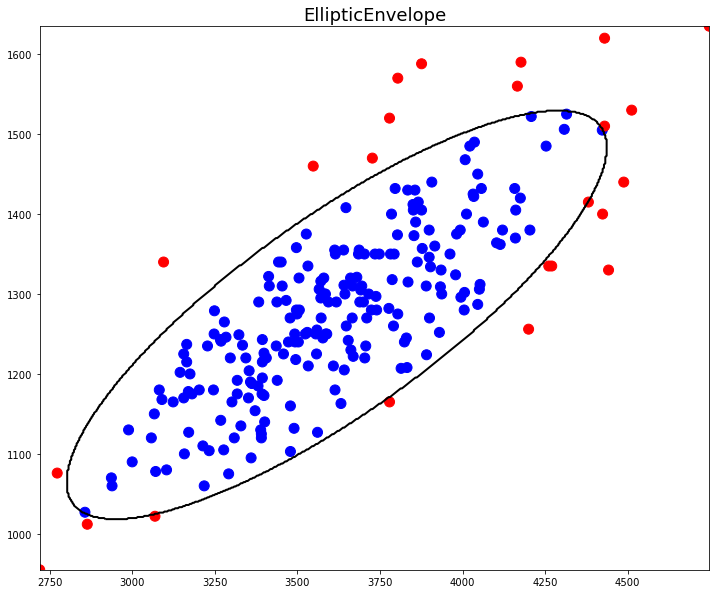

In [81]:
plt.figure(figsize=(12, 10))

plt.title('EllipticEnvelope', size=18)

colors = np.array(['r', 'b'])

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

In [83]:
isf =  IsolationForest( contamination=0.08)

In [84]:
y_pred = isf.fit_predict(X)

y_pred

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [85]:
n_outliers = (y_pred == -1).sum()
n_outliers

19

In [86]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                     np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


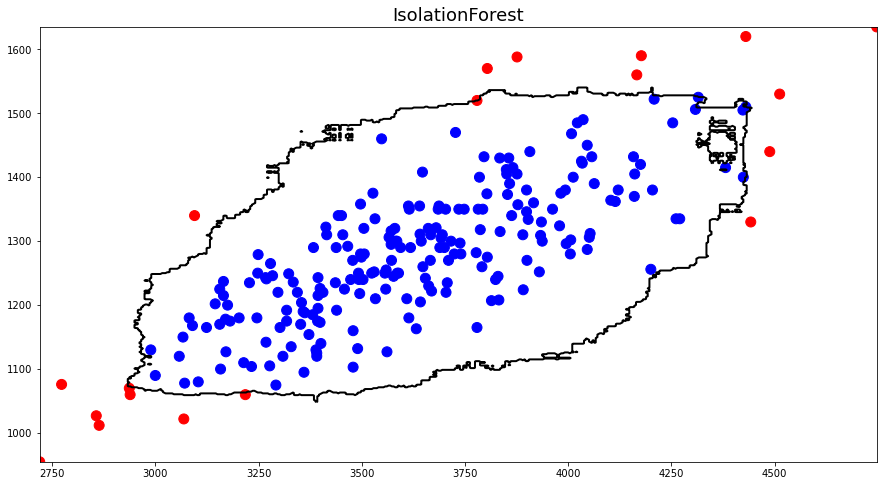

In [87]:
plt.figure(figsize=(15, 8))

plt.title('IsolationForest', size=18)

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=100, 
            color=colors[(y_pred + 1) // 2])


plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

In [88]:
lof = LocalOutlierFactor(n_neighbors=15, contamination='auto')

In [89]:
y_pred = lof.fit_predict(X)

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [90]:
n_outliers = (y_pred == -1).sum()
n_outliers

12

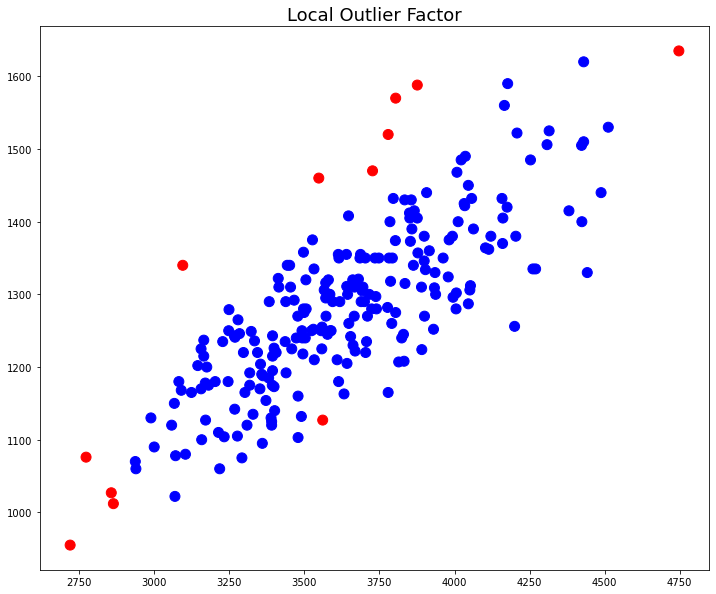

In [91]:
plt.figure(figsize=(12, 10))

plt.title('Local Outlier Factor', size=18)

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.show()